# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import os

print(os.getcwd())

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

C:\Users\dad\Documents\Udacity\hack\Markup\CarND-Traffic-Sign-Classifier-Project-master


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

### 1.1 Basic Data Summary

We examined the structure of the dataset. Like the total numbers, shapes, sizes etc.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples  =", n_test)
print("Image data shape            =", image_shape)
print("Single image data shape     =", X_train[1].shape)
print("Number of classes           =", n_classes)

Number of training examples = 34799
Number of testing examples  = 12630
Image data shape            = (34799, 32, 32, 3)
Single image data shape     = (32, 32, 3)
Number of classes           = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In total, we have 43 classes. They are [label, description] as follows:

[[0 'Speed limit (20km/h)']
 [1 'Speed limit (30km/h)']
 [2 'Speed limit (50km/h)']
 [3 'Speed limit (60km/h)']
 [4 'Speed limit (70km/h)']
 [5 'Speed limit (80km/h)']
 [6 'End of speed limit (80km/h)']
 [7 'Speed limit (100km/h)']
 [8 'Speed limit (120km/h)']
 [9 'No passing']
 [10 'No passing for vehicles over 3.5 metric tons']
 [11 'Right-of-way at the next intersection']
 [12 'Priority road']
 [13 'Yield']
 [14 'Stop']
 [15 'No vehicles']
 [16 'Vehicles over 3.5 metric tons prohibited']
 [17 'No entry']
 [18 'General caution']
 [19 'Dangerous curve to the left']
 [20 'Dangerous curve to the right']
 [21 'Double curve']
 [22 'Bumpy road']
 [23 'Slippery road']
 [24 'Road narrows on the right']
 [25 'Road work']
 [26 'Traffic signals']
 [27 'Pedestrians']
 [28 'Children crossing']
 [29 'Bicycles crossing']
 [30 'Beware of ice/snow']
 [31 'Wild animals crossing']
 [32 'End of all speed and passing limits']
 [33 '

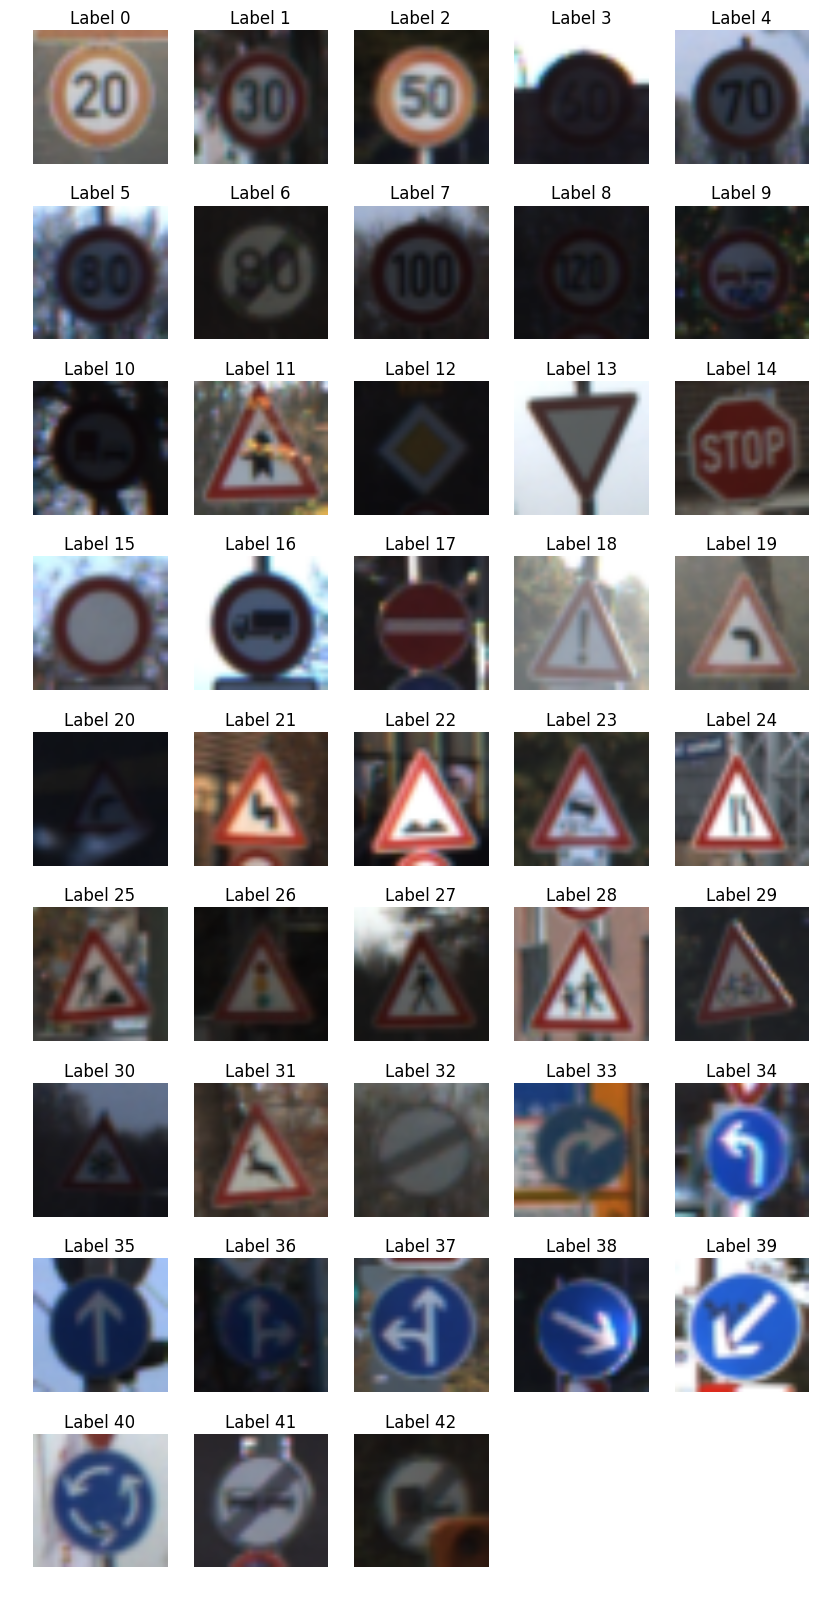

In [3]:
# Look at the traffic signs.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# obtain features description
signNames = np.array(pd.read_csv('./signnames.csv'))

def show_all_labels(X, y):
    """
    Display a smaple image each traffic sgin class/label.
    :param X: image data
    :param y: label data
    Notes. the function used nonlocal variables signNames and n_calsses
    """
    num_classes = len(np.unique(y))
    column = 5
    row = num_classes//column + 1
    plt.figure(figsize=(10, 20))
    for i in range(num_classes):
        plt.subplot(row, column, i+1)
        position = np.where(y==signNames[i][0])[0][110]
        plt.imshow(X[position])
        plt.axis('off')
        plt.title('Label ' + str(i))
    plt.show()
print('In total, we have {} classes. They are [label, description] as follows:\n'.format(n_classes))
print(signNames)
print('\nFor corresponding images, refer to the following.')
show_all_labels(X_train, y_train)

We find there are 43 different traffic signs.  Investigation on traffic sign recognition reveals 
that it can be done in greyscale while greatly reducing thruput which is important for my low
performance laptop PC I am using.  This will also be important for a low cost embedded solution.

Look at the sign distribution of the data set available below:


Distribution of our Present Training Data:



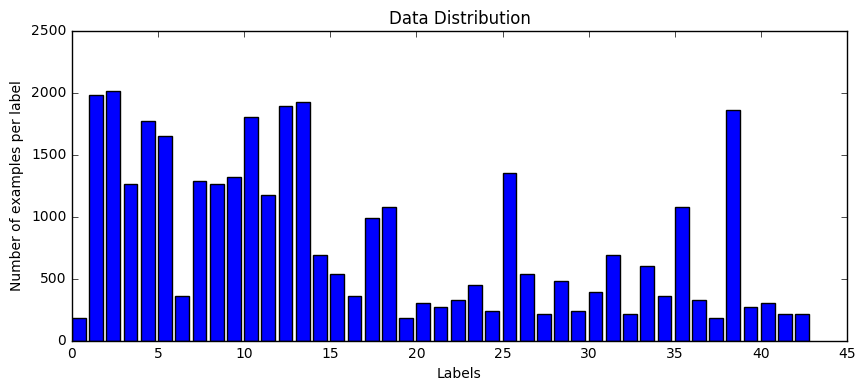

In [4]:
def data_distribution(y):
    """
    This function is used to check the distribution of data y.
    :param y: the set of labels (of training or testing data)
    No return but draw the distribution of y
    """
    plt.figure(figsize=(10, 4))
    num_per_label = np.bincount(y)
    num_labels = len(num_per_label)
    plt.bar(np.arange(num_labels), num_per_label, label='Inputs per label')
    plt.xlabel('Labels')
    plt.ylabel('Number of examples per label')
    plt.title('Data Distribution')
    plt.ylim((0,2500))
    plt.show()

print('\nDistribution of our Present Training Data:\n')
data_distribution(y_train)


We find a widely varying distributution, and we should distribute the data so it is evenly distributed 
aming all of them.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

### Data Preprocessing 

** Grayscale**

Since converting traffic sign images to grayscale will reduce the amount of future computation while 
still keep required information, cv2.cvtColor(src, cv2.COLOR_RGB2GRAY) is used on training and 
testing data.

** Data Balancing**

Gaussian bluring, adding noise to boundaries, random rotation, enhancing contrast and random scaling 
will be used in data balancing. 

The idea is to introduce noise to existing data to produce extra images for training. 
We only add noise to boundaries, aiming to force the model focus on the middle part of images. 
Rotations are not used since it looks to be present in the data set. We use gaussian bluring, trying
to increase the abstraction. On the other side, we taking this measure trying to increase the 
model's accuracy.

** Normalization**

The grayscaled test data and balanced training data will be normalized to the range of [0.1, 0.9] 
for the sake of computational efficiency.

** Splitting** 

Split obtained training data into a new training data and a validation data. The model will be build
and trained based on the sets here.

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
# Grayscale
import cv2

X_train_gray = np.array([cv2.cvtColor(X_train[i], cv2.COLOR_RGB2GRAY) for i in range(n_train)])
X_test_gray = np.array([cv2.cvtColor(X_test[i], cv2.COLOR_RGB2GRAY) for i in range(n_test)])

print('X_train after grayscale:', X_train_gray.shape)
print('X_test after grayscale: ', X_test_gray.shape)

X_train after grayscale: (34799, 32, 32)
X_test after grayscale:  (12630, 32, 32)


This is a test for image_bluring:



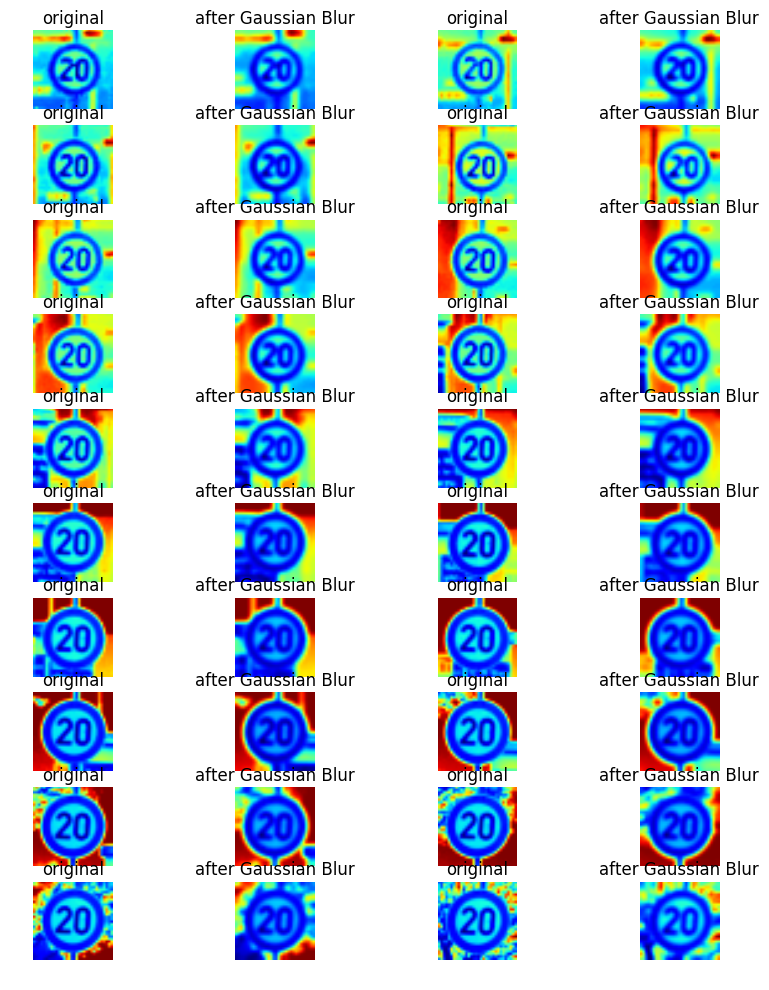

This is a test for add_noise_to_boundaries:

This is a test for random_rotation:



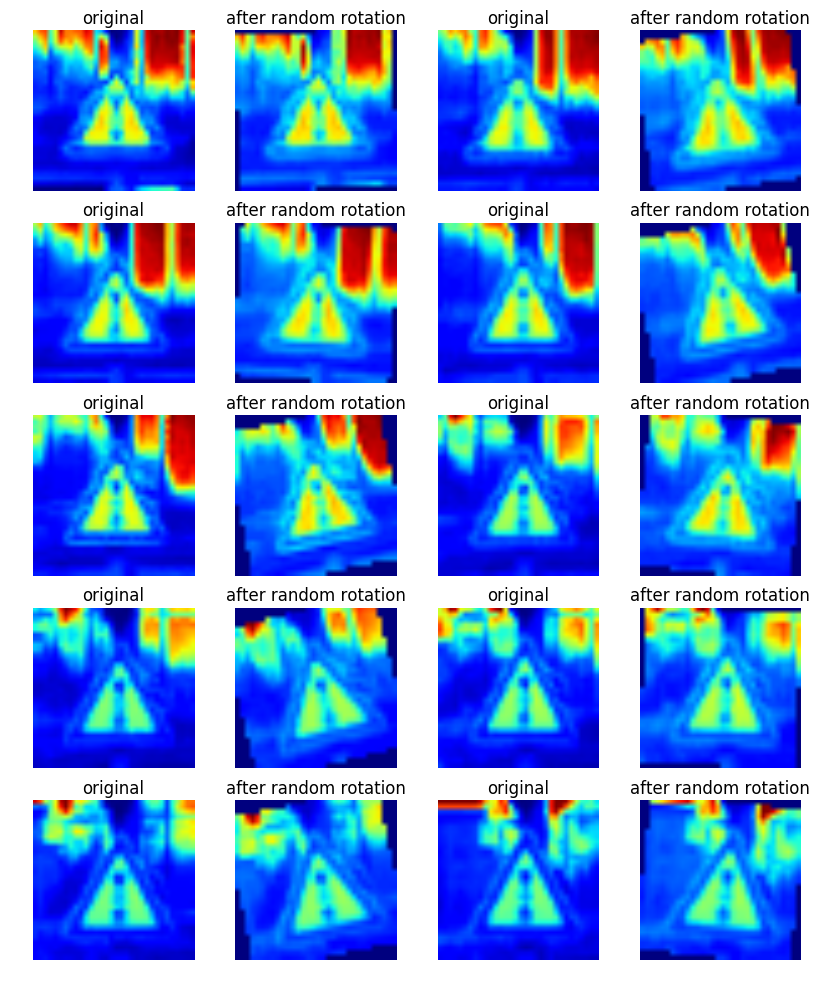

This is a test for contrast_enhance:



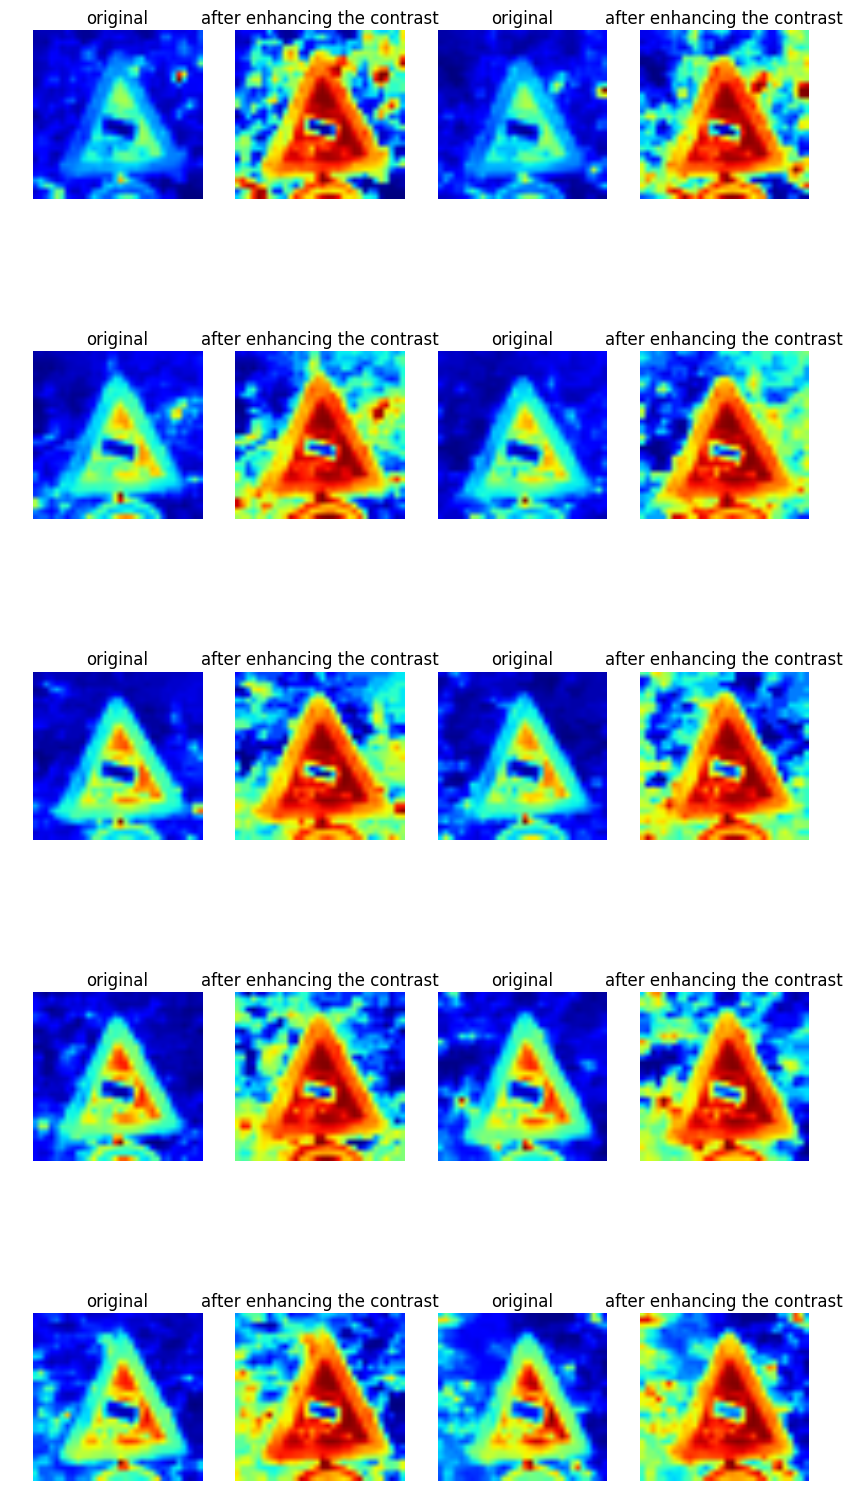

This is a test for random_scaling:



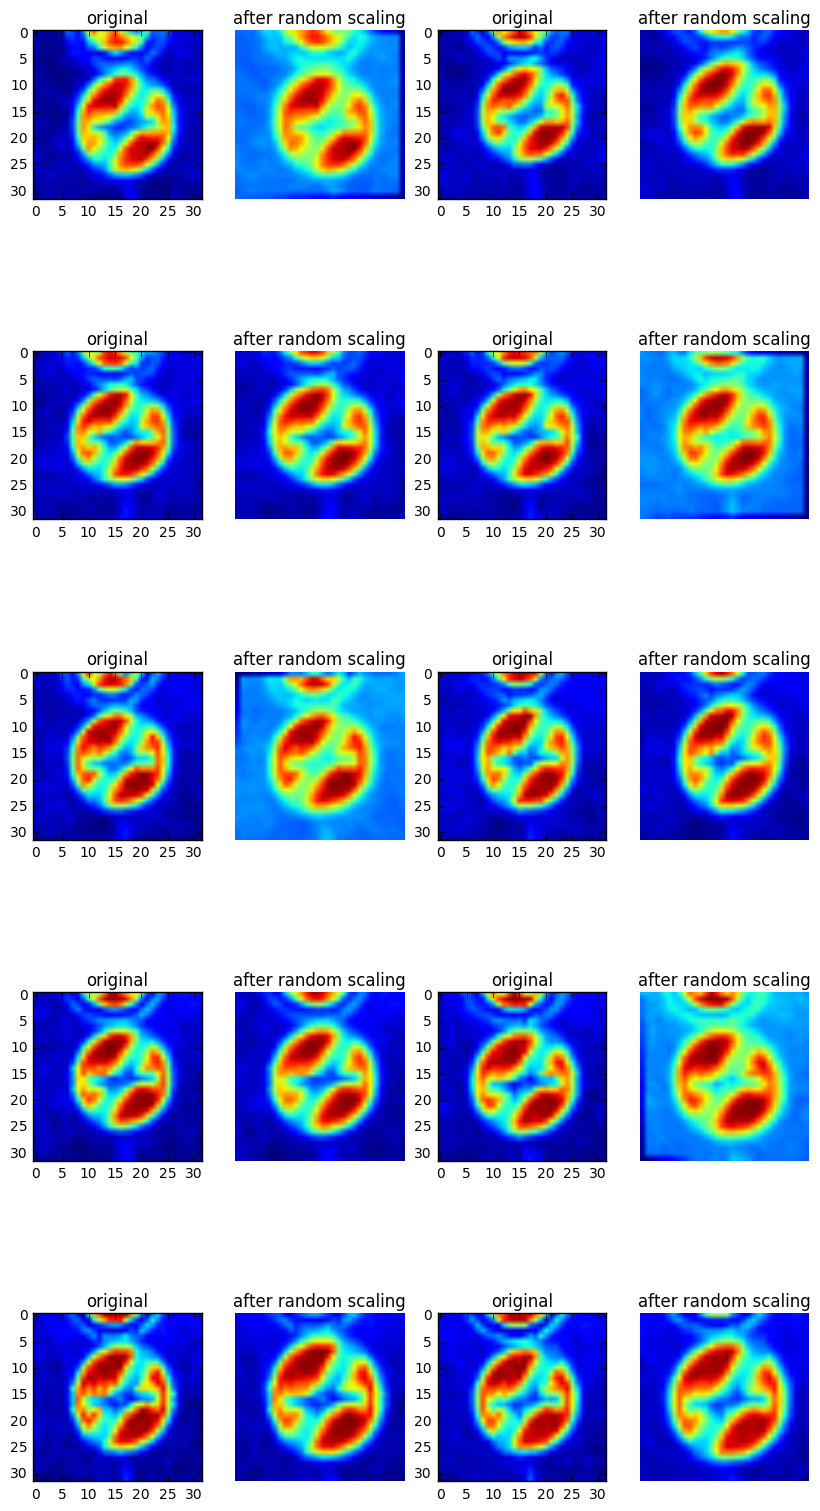

In [6]:
# Data balancing functions
from scipy.ndimage import rotate

def image_bluring(imgs, k=3):
    """
    Guassian bluring with kernel size (kxk) is performed on imgs
    """
    l = len(imgs)
    img_blur = np.array([cv2.GaussianBlur(imgs[i], (k,k) , 0) for i in range(l)])
    return img_blur
## image_bluring test code:
print('This is a test for image_bluring:\n')
testData = X_train_gray[10000:10020]
X_blur_test = image_bluring(testData)
plt.figure(figsize=(10, 12))
for i in range(20):
    plt.subplot(10,4,2*i+1)
    plt.imshow(testData[i])
    plt.axis('off')
    plt.title('original')
    plt.subplot(10,4,2*i+2)
    plt.imshow(X_blur_test[i])
    plt.axis('off')
    plt.title('after Gaussian Blur')
plt.show()

def add_noises_to_boundaries(imgs, width=3):
    """
    Given images data, add noises to boundaries where are less than width=3 pxs away from boundaries.
    """
    shape = imgs.shape
    noises = np.random.randint(0,256,shape)
    noises[:, width:(shape[1]-width), width:(shape[2]-width)] = 0
    imgs_noises = (imgs + noises)%256
    return imgs_noises
## add_noise_to_boundaries test code:
print('This is a test for add_noise_to_boundaries:\n')
testData = np.ones((2,10,10))
#print('Test data:\n', testData)
testData_noises = add_noises_to_boundaries(testData, width=2)
#print('After adding noises:\n', testData_noises)

def random_rotation(imgs, samples=[-14,-12,-10,-8,-6,-4,-2,2,4,6,8,10,12,14]):
    """
    Given images data, return result after random rotation.
    """
    l = len(imgs)
    angles = np.random.choice(samples, size=l, replace=True)
    imgs_rotated = np.array([rotate(imgs[i], angles[i], reshape=False) for i in range(l)])
    return imgs_rotated
## random_rotation test code:
print('This is a test for random_rotation:\n')
testData = X_train_gray[1230:1240]
testData_rotated = random_rotation(testData)
plt.figure(figsize=(10, 12))
for i in range(10):
    plt.subplot(5,4,2*i+1)
    plt.imshow(testData[i])
    plt.axis('off')
    plt.title('original')
    plt.subplot(5,4,2*i+2)
    plt.imshow(testData_rotated[i])
    plt.axis('off')
    plt.title('after random rotation')
plt.show()

def contrast_enhance(imgs):
    """
    return images with enhanced constrast.
    """
    l = len(imgs)
    contrast_enhanced = np.array([cv2.equalizeHist(imgs[i]) for i in range(l)])
    return contrast_enhanced
## This is test code for contrast_enhance.
print('This is a test for contrast_enhance:\n')
testData = X_train_gray[2000:2010]
testData_contrast_enhanced = contrast_enhance(testData)
plt.figure(figsize=(10, 20))
for i in range(10):
    plt.subplot(5,4,2*i+1)
#    plt.imshow(img_gray[i])
    plt.imshow(testData[i])
    plt.axis('off')
    plt.title('original')
    plt.subplot(5,4,2*i+2)
    plt.imshow(testData_contrast_enhanced[i])
    plt.axis('off')
    plt.title('after enhancing the contrast')
plt.show()

def random_scaling(imgs):
    """
    Given images data, return random scaled images.
    """
    shape = imgs.shape
    corner = np.random.randint(-1,3,(shape[0], 4))
    pts1 = np.array([np.float32([[corner[i,0],corner[i,0]], 
                                [shape[2]-corner[i,1], corner[i,1]],
                                [shape[2]-corner[i,2], shape[1]-corner[i,2]],
                                [corner[i,3], shape[1]-corner[i,3]]]) for i in range(shape[0])])
    pts2 = np.float32([[0,0],[shape[2],0],[shape[2],shape[1]],[0,shape[1]]])
    M = np.array([cv2.getPerspectiveTransform(pts1[i], pts2) for i in range(shape[0])])
    dst = np.array([cv2.warpPerspective(imgs[i], M[i],(shape[1], shape[2])) for i in range(shape[0])])
    return dst
## This is the test code for random_scaling

print('This is a test for random_scaling:\n')
testData = X_train_gray[0:10]
testData_random_scaled = random_scaling(testData)
plt.figure(figsize=(10, 20))
for i in range(10):
    plt.subplot(5,4,2*i+1)
    plt.imshow(testData[i])
    plt.title('original')
    plt.subplot(5,4,2*i+2)
    plt.imshow(testData_random_scaled[i])
    plt.axis('off')
    plt.title('after random scaling')
plt.show()   

In [7]:
def balance_data(X,y):
    """
    Use image_bluring, add_noises_to_boundaries, random_rotation, contrast_enhance and random_scaling to balance the data (X,y)
    :param X: graysclae image data with a shape e.g. (number_of_examples, 32, 32).
    :param y: image labels data with a shape e.g. (number_of_examples,).
    :return: balanced data (X_balanced, y_balanced)
    Note. the labels in y should be continuous integers and start from 0, e.g. np.unique(y) = np.array([0,1,...,42])
    """
    num_per_label = np.bincount(y)
    # set the threshold so that the classes whose number of examples are below it will be increased.
    threshold = np.max(num_per_label)
    X_new, y_new = X, y
    for i in range(len(num_per_label)):
        print('label:', i)
        num_increase = threshold - num_per_label[i]
        if num_increase < 10:
            print('num_increase is: 0')
            continue
        #find out the positions where the label is i and save them into index_i
        index_i = np.where(y==i)[0]
        index_increase = np.random.choice(index_i, size=num_increase)
        print('num_increase is:', num_increase)
        #3/9 random_rotation    [0, 3, 6]/[0,1,2,3,4,5,6,7,8] (+ another 1/9 later)
        X_new = np.append(X_new, random_rotation(X[index_increase[0:num_increase:3]]), axis=0)
        y_new = np.append(y_new, y[index_increase[0:num_increase:3]], axis=0)
        #1/9 image_bluring (3x3)      [1]/[0,1,2,3,4,5,6,7,8]
        X_new = np.append(X_new, image_bluring(X[index_increase[1:num_increase:9]], k=3), axis=0)
        y_new = np.append(y_new, y[index_increase[1:num_increase:9]], axis=0)
        #1/9 image_bluring (5x5)      [2]/[0,1,2,3,4,5,6,7,8]
        X_new = np.append(X_new, image_bluring(X[index_increase[2:num_increase:9]], k=5), axis=0)
        y_new = np.append(y_new, y[index_increase[2:num_increase:9]], axis=0)
        #1/9 add_noises_to_boundaries [4]/[0,1,2,3,4,5,6,7,8]
        X_new = np.append(X_new, add_noises_to_boundaries(X[index_increase[4:num_increase:9]]), axis=0)
        y_new = np.append(y_new, y[index_increase[4:num_increase:9]], axis=0)
        #1/9 random_rotation          [5]/[0,1,2,3,4,5,6,7,8]
#        X_new = np.append(X_new, random_rotation(X[index_increase[5:num_increase:9]]), axis=0)
#        y_new = np.append(y_new, y[index_increase[5:num_increase:9]], axis=0)
        #1/9 contrast_enhance         [7]/[0,1,2,3,4,5,6,7,8]
        X_new = np.append(X_new, contrast_enhance(X[index_increase[7:num_increase:9]]), axis=0)
        y_new = np.append(y_new, y[index_increase[7:num_increase:9]], axis=0)
        #1/9 random_scaling           [8]/[0,1,2,3,4,5,6,7,8]
        X_new = np.append(X_new, random_scaling(X[index_increase[8:num_increase:9]]), axis=0)
        y_new = np.append(y_new, y[index_increase[8:num_increase:9]], axis=0)
    return X_new, y_new        
        
X_train_balanced, y_train_balanced = balance_data(X_train_gray, y_train)

label: 0
num_increase is: 1830
label: 1
num_increase is: 30
label: 2
num_increase is: 0
label: 3
num_increase is: 750
label: 4
num_increase is: 240
label: 5
num_increase is: 360
label: 6
num_increase is: 1650
label: 7
num_increase is: 720
label: 8
num_increase is: 750
label: 9
num_increase is: 690
label: 10
num_increase is: 210
label: 11
num_increase is: 840
label: 12
num_increase is: 120
label: 13
num_increase is: 90
label: 14
num_increase is: 1320
label: 15
num_increase is: 1470
label: 16
num_increase is: 1650
label: 17
num_increase is: 1020
label: 18
num_increase is: 930
label: 19
num_increase is: 1830
label: 20
num_increase is: 1710
label: 21
num_increase is: 1740
label: 22
num_increase is: 1680
label: 23
num_increase is: 1560
label: 24
num_increase is: 1770
label: 25
num_increase is: 660
label: 26
num_increase is: 1470
label: 27
num_increase is: 1800
label: 28
num_increase is: 1530
label: 29
num_increase is: 1770
label: 30
num_increase is: 1620
label: 31
num_increase is: 1320
labe

In [8]:
from sklearn.utils import shuffle

print(X_train.shape, y_train.shape)
print(X_train_balanced.dtype, X_train.dtype)

(34799, 32, 32, 3) (34799,)
int32 uint8


In [9]:
shape = X_train_gray.shape + (1,)
print(shape)
X_train_gray = X_train_gray.reshape(shape)
print(X_train_gray.shape)

(34799, 32, 32, 1)
(34799, 32, 32, 1)


In [10]:
# Normalization (range [0.1, 0.9])

#def normalize(X, a=0.1, b=0.9):

#    Normalize the image data with Min-Max scaling to a range of [a, b]
#    :param X: image data to be normalized
#    :return: normalized image data

#    grayscale_min = 0
#    grayscale_max = 255
 #   return a + ( ( (X - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

#X_train_bn = normalize(X_train_balanced)
#X_test = normalize(X_test_gray)


In [11]:
# Normalization (range [0.1, 0.9])

def normalize(X, a=0.1, b=0.9):
    """
    Normalize the image data with Min-Max scaling to a range of [a, b]
    :param X: image data to be normalized
    :return: normalized image data
    """
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (X - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

X_train_bn = normalize(X_train_balanced)
X_test = normalize(X_test_gray)

In [12]:
# Reshape and Splitting

import numpy as np
from sklearn.model_selection import train_test_split

shape1 = X_train_bn.shape + (1,)
X_train_bn = X_train_bn.reshape(shape1)
shape2 = X_test.shape + (1,)
X_test = X_test.reshape(shape2)

X_train, X_validation, y_train, y_validation = train_test_split(X_train_bn, y_train_balanced, 
                                                                test_size=0.2, random_state=123)

print("Number of training examples   =", len(X_train))
print("Number of validation examples =", len(X_validation))
print("Number of testing examples    =", len(X_test))
print("Single image data shape       =", X_train[0].shape)
print("Number of classes             =", n_classes)

Number of training examples   = 64557
Number of validation examples = 16140
Number of testing examples    = 12630
Single image data shape       = (32, 32, 1)
Number of classes             = 43


## SOLUTION: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [13]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [14]:
import tensorflow as tf

#EPOCHS = 10 use this if you are starting a new session otherwise set it to 1
EPOCHS = 1
BATCH_SIZE = 256

In [15]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

keep_prob = tf.placeholder(tf.float32)

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #SOLUTION: Layer 0: 
    #part 1. Convolutional. Input = 32x32x1. Output = 32x32x4.
    conv0_W = tf.Variable(tf.truncated_normal(shape=(1,1,1,4), mean=mu, stddev=sigma))
    conv0_b = tf.Variable(tf.zeros(4))
    conv0   = tf.nn.conv2d(x, conv0_W, strides=[1,1,1,1], padding='SAME') + conv0_b
    conv0   = tf.nn.relu(conv0)
    
    #Layer 0, part 2. Convolutional. Input = conv0: 32x32x4. Output = 32x32x32.
    conv01_W = tf.Variable(tf.truncated_normal(shape=(3,3,4,32), mean=mu, stddev=sigma))
    conv01_b = tf.Variable(tf.zeros(32))
    conv01   = tf.nn.conv2d(conv0, conv01_W, strides=[1,1,1,1], padding='SAME') + conv01_b
    conv01   = tf.nn.relu(conv01)
    
    #Layer0, part 3. Convolutional. Input = conv0: 32x32x4. Output = 32x32x32.
    conv02_W = tf.Variable(tf.truncated_normal(shape=(5,5,4,32), mean=mu, stddev=sigma))
    conv02_b = tf.Variable(tf.zeros(32))
    conv02   = tf.nn.conv2d(conv0, conv02_W, strides=[1,1,1,1], padding='SAME') + conv02_b
    conv02   = tf.nn.relu(conv02)
    
    #Layer0, part 4.1. Max-Pooling. Input = x: 32x32x1. Output = 32x32x1.
    conv03   = tf.nn.max_pool(x, ksize=[1,3,3,1], strides=[1,1,1,1], padding='SAME')
    #Layer0, part 4.2. Convolutional. Input = conv03: 32x32x1. Output = 32x32x4.
    conv03_W = tf.Variable(tf.truncated_normal(shape=(1,1,1,4), mean=mu, stddev=sigma))
    conv03_b = tf.Variable(tf.zeros(4))
    conv03   = tf.nn.conv2d(conv03, conv03_W, strides=[1,1,1,1], padding='SAME') + conv03_b
    conv03   = tf.nn.relu(conv03)
    
    #Layer0 concat layer. Output = 32x32x72
    #conv0 = tf.concat_v2([conv0, conv01, conv02, conv03],3)
    conv0 = tf.concat([conv0, conv01, conv02, conv03], 3)
    
    #Add dropout 
    conv0 = tf.nn.dropout(conv0, keep_prob=keep_prob)   
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x72. Output = 28x28x128.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 72, 128), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(128))
    conv1   = tf.nn.conv2d(conv0, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # SOLUTION: Pooling. Input = 28x28x128. Output = 14x14x128.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Add dropout
    conv1 = tf.nn.dropout(conv1, keep_prob=keep_prob)
    
    # SOLUTION: Layer 2: Convolutional. Input = 14x14x128. Output = 10x10x256.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 128, 256), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(256))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x256. Output = 5x5x256.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x256. Output = 6400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Globle Idea Layer. Input = x: 32x32x1. Output = 1024
    g0 = flatten(x)
    # Input = g0: 1024. Output = 256.
    gl_W = tf.Variable(tf.truncated_normal(shape=(1024,256), mean=mu, stddev=sigma))
    gl_b = tf.Variable(tf.zeros(256))
    gl = tf.matmul(g0, gl_W) + gl_b
    gl = tf.nn.relu(gl)

    #Concat layer. Output = 6400+256=6656
    fc0 = tf.concat([fc0, gl],1)
    
    #Add Dropout
    fc0 = tf.nn.dropout(fc0, keep_prob=keep_prob)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 6656. Output = 512.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(6656, 512), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(512))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    ## Add Dropout 
    fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 512. Output = 128.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(512, 128), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(128))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Add Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob=keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 128. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(128, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [16]:
## Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [17]:
## Training Pipeline

rate = tf.Variable(0.001)

logits = LeNet(x)
#cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits( logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [18]:
print(tf.__version__)

1.0.0


In [19]:
## Model Evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [20]:
print(tf.__version__)

1.0.0


In [21]:
## Train the model  Uncomment if you are just starting to train.  OTHERWISE you will OVERWRITE your 
## Trained data
"""
import tensorflow as tf

from sklearn.utils import shuffle

with tf.Session() as sess:
    saver.restore(sess, 'lenet/')
#    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        print("EPOCHS =", i)
        if i > 10:
            rate = 0.001
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            print("Offset = ", offset)
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.4f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet/')
    print("Model saved")
"""

'\nimport tensorflow as tf\n\nfrom sklearn.utils import shuffle\n\nwith tf.Session() as sess:\n    saver.restore(sess, \'lenet/\')\n#    sess.run(tf.global_variables_initializer())\n    num_examples = len(X_train)\n    \n    print("Training...")\n    print()\n    for i in range(EPOCHS):\n        print("EPOCHS =", i)\n        if i > 10:\n            rate = 0.001\n        X_train, y_train = shuffle(X_train, y_train)\n        for offset in range(0, num_examples, BATCH_SIZE):\n            print("Offset = ", offset)\n            end = offset + BATCH_SIZE\n            batch_x, batch_y = X_train[offset:end], y_train[offset:end]\n            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})\n            \n        validation_accuracy = evaluate(X_validation, y_validation)\n        print("EPOCH {} ...".format(i+1))\n        print("Validation Accuracy = {:.4f}".format(validation_accuracy))\n        print()\n        \n    saver.save(sess, \'lenet/\')\n    print("Mode

In [22]:
EPOCHS = 1

In [ ]:
## Train the model use the data from past runs set EPOCHS before RUNNING
import tensorflow as tf

from sklearn.utils import shuffle

with tf.Session() as sess:
    saver.restore(sess, 'lenet/')
#    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        print("EPOCHS =", i)
        if i > 10:
            rate = 0.001
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            print("Offset = ", offset)
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.4f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet/')
    print("Model saved")

In [23]:
# evaluate test set
import tensorflow as tf

saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, 'lenet/')
    prediction_accuracy = evaluate(X_test, y_test)
    print("Test accuracy on new images = {:.3f}".format(prediction_accuracy))

Test accuracy on new images = 0.957


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Completed! The shape is: (5, 32, 32)


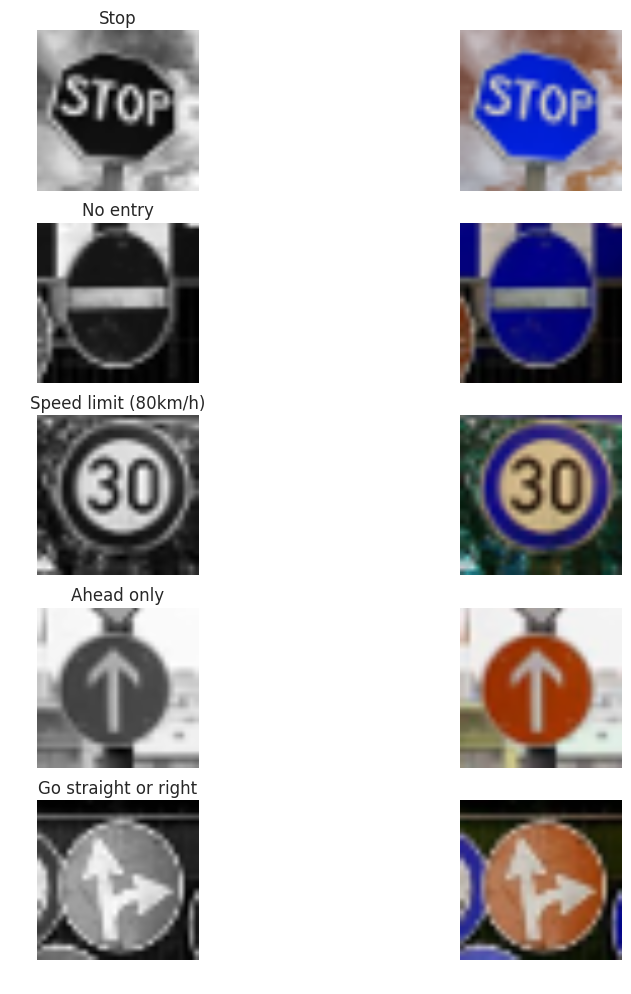

In [112]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

new_images_dir = './signs_small/'

# read and resize images
def read_and_resize(images_dir):
    """
    Given images directory, read and resize the images. Output a ndarray data
    """
    output_gray, output_original = [], []
    for file_name in os.listdir(images_dir):
        #read
        image = cv2.imread(images_dir+file_name)
        #resize
        image = cv2.resize(image, (32,32))
        #grayscale
        image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        #normalize to [0.1,0.9]
        image_gray = 0.1 + image_gray*0.8/255
        output_gray.append(image_gray)
        output_original.append(image)
    output_gray, output_original = np.array(output_gray), np.array(output_original)
    print('Completed! The shape is:', output_gray.shape)
    return output_gray, output_original

new_test_images, original = read_and_resize(new_images_dir)
image_names = ['Stop','No entry', 'Speed limit (80km/h)', 
               'Ahead only', 'Go straight or right']

# plot new test examples
plt.figure(figsize=(10,12))
for i in range(5):
    plt.subplot(5, 2, 2*i+1)
    plt.imshow(new_test_images[i], cmap='gray')
    plt.axis('off')
    plt.title(image_names[i])
    plt.subplot(5, 2, 2*i+2)
    plt.imshow(original[i])
    plt.axis('off')
plt.show()

In [114]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
top5 = tf.nn.top_k(tf.nn.softmax(logits), k=5, sorted=True, name=None)

print(new_test_images.shape)
shape = new_test_images.shape + (1,)
print(shape)
new_test_images1 = new_test_images.reshape(shape)
print(new_test_images1.shape)
with tf.Session() as sess:
    saver.restore(sess, 'lenet/')
    
    test_prob = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=k), feed_dict={x: new_test_images1, keep_prob: 1})    
    top5_result  = sess.run(top5, feed_dict={x: X_own_gray, keep_prob: 1.0})
    
    


(5, 32, 32)
(5, 32, 32, 1)
(5, 32, 32, 1)


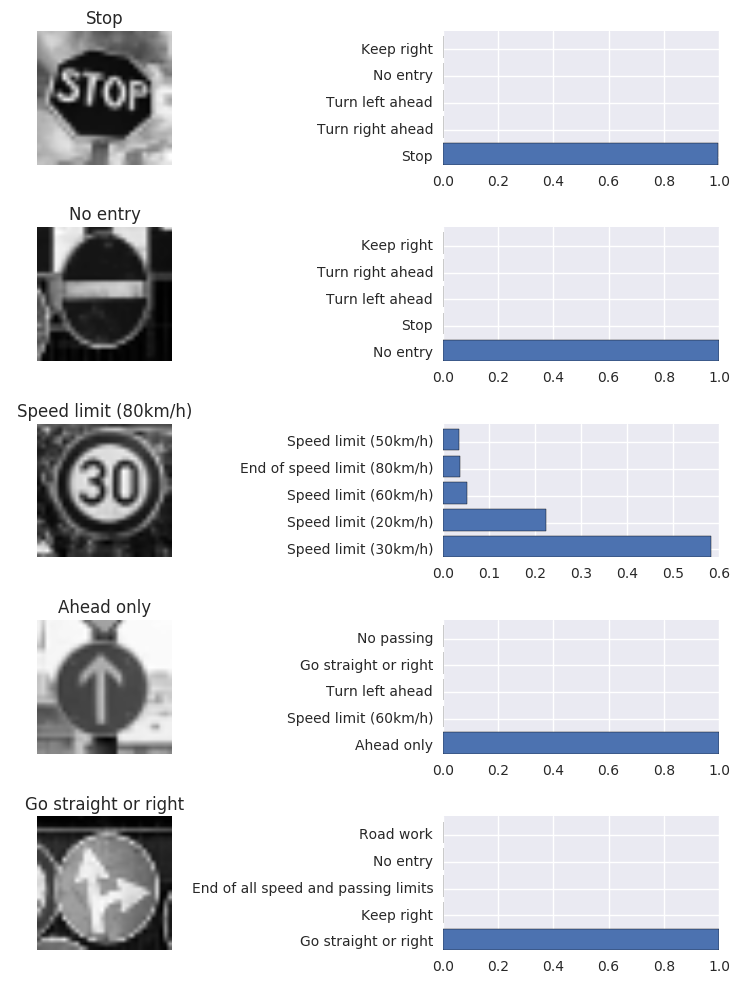

In [115]:
import seaborn as sns

plt.rcParams['figure.figsize'] = (8.0, 10.0)
#image_indices = np.arange(0, len(images_resized))
for i in range(k):
    with sns.axes_style("white"):
        plt.subplot(k, 2, 2*i+1)
    plt.imshow(np.squeeze(new_test_images[i]), cmap='gray')
    plt.axis('off')
    plt.title(image_names[i])
    plt.subplot(k ,2, 2*i+2)
    plt.barh(np.arange(k), test_prob.values[i])
    plt.yticks(np.arange(k)+0.3, signNames[test_prob.indices[i],1])
    plt.tight_layout()

### Predict the Sign Type for Each Image

In [117]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
top5 = tf.nn.top_k(tf.nn.softmax(logits), k=5, sorted=True, name=None)

print(new_test_images.shape)
shape = new_test_images.shape + (1,)
print(shape)
new_test_images1 = new_test_images.reshape(shape)
print(new_test_images1.shape)
with tf.Session() as sess:
    saver.restore(sess, 'lenet/')
    
    test_prob = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=k), feed_dict={x: new_test_images1, keep_prob: 1})    
    top5_result  = sess.run(top5, feed_dict={x: X_own_gray, keep_prob: 1.0})
    
    


(5, 32, 32)
(5, 32, 32, 1)
(5, 32, 32, 1)


### Analyze Performance

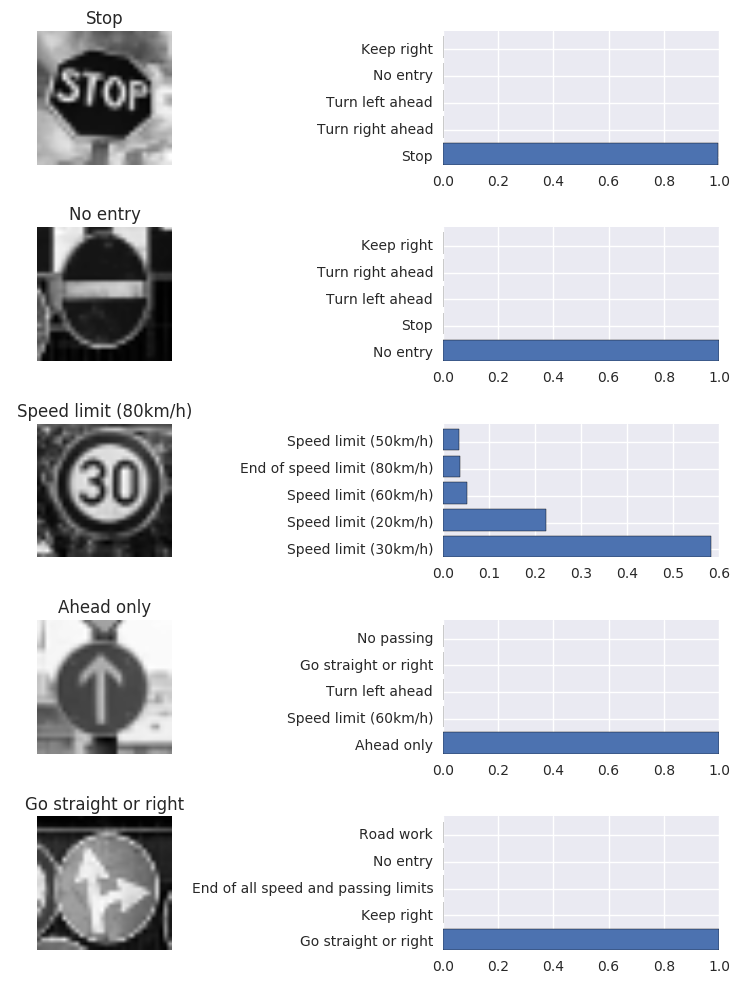

In [118]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
import seaborn as sns

plt.rcParams['figure.figsize'] = (8.0, 10.0)
#image_indices = np.arange(0, len(images_resized))
for i in range(k):
    with sns.axes_style("white"):
        plt.subplot(k, 2, 2*i+1)
    plt.imshow(np.squeeze(new_test_images[i]), cmap='gray')
    plt.axis('off')
    plt.title(image_names[i])
    plt.subplot(k ,2, 2*i+2)
    plt.barh(np.arange(k), test_prob.values[i])
    plt.yticks(np.arange(k)+0.3, signNames[test_prob.indices[i],1])
    plt.tight_layout()

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [119]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
saver = tf.train.Saver()

#predictions = tf.nn.softmax(logits)
#top_5 = tf.nn.top_k(predictions, k=5)

with tf.Session() as sess:
    saver.restore(sess, 'lenet/')
    
    test_prob = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=k), feed_dict={x: new_test_images1, keep_prob: 1})    
    top5_result  = sess.run(top5, feed_dict={x: X_own_gray, keep_prob: 1.0})

    print("Top 5 Softmax:", top5_result)

Top 5 Softmax: TopKV2(values=array([[ 0.12077141,  0.10929486,  0.07265113,  0.07254582,  0.0681562 ],
       [ 0.05766664,  0.0419605 ,  0.03793675,  0.03677571,  0.03502652],
       [ 0.31912807,  0.09284141,  0.09241247,  0.07680505,  0.06637298],
       [ 0.22747834,  0.21105024,  0.10039452,  0.10000996,  0.08251574],
       [ 0.48619148,  0.08327498,  0.0606553 ,  0.05552338,  0.04515431],
       [ 0.94701558,  0.03062169,  0.0131209 ,  0.00221203,  0.00201682],
       [ 0.4593707 ,  0.39751941,  0.09632437,  0.01019423,  0.00903542],
       [ 0.66244328,  0.1264365 ,  0.06752991,  0.05432948,  0.04825526]], dtype=float32), indices=array([[29, 35, 13, 28, 36],
       [14, 25, 12, 24, 17],
       [15,  3, 29, 13, 38],
       [38, 34, 29, 28, 15],
       [33, 13, 14, 35, 34],
       [35, 36, 34, 13, 25],
       [40,  7,  1,  5, 12],
       [ 9, 20, 10, 16, 23]]))


---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 